In [65]:
import seaborn as sns
import folium
import folium.plugins as folium_plugins
import geopandas as gpd
import pandas as pd
from logging import warning
import matplotlib.pyplot as plt

from utils.downloads import (
    Censo,
    Nivel,
    download_malha,
    download_dados,
)

In [2]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

# Carregamento dos dados

Primeiro, vamos carregar os dados das geometrias e de similaridade.

In [3]:
%%time
setores10 = download_malha(Censo.CENSO_2010, Nivel.SETORES)
setores10 = setores10[setores10['CD_GEOCODM'] == '3550308']
setores10 = setores10.to_crs(epsg=31983)
setores10.sample(3)

CPU times: user 18.2 s, sys: 836 ms, total: 19 s
Wall time: 20.3 s


ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
47149  112717.0  355030823000075  URBANO  35503082300       None  355030823   
48207  113685.0  355030827000134  URBANO  35503082700       None  355030827   
60253  125821.0  355030885000034  URBANO  35503088500       None  355030885   

         NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  \
47149  CIDADE DUTRA    3550308  SÃO PAULO  SÃO PAULO   
48207       CURSINO    3550308  SÃO PAULO  SÃO PAULO   
60253  VILA FORMOSA    3550308  SÃO PAULO  SÃO PAULO   

                          NM_MESO CD_GEOCODB NM_BAIRRO    ID1  \
47149  METROPOLITANA DE SÃO PAULO       None      None  47150   
48207  METROPOLITANA DE SÃO PAULO       None      None  48208   
60253  METROPOLITANA DE SÃO PAULO       None      None  60254   

                                                geometry  
47149  POLYGON ((328326.804 7375752.823, 328327.768 7...  
48207  POLYGON ((335602.592 7384741.400, 335595.903 7...  
60253  POLYGON ((341710.053 7392534.769, 341667.099 7...

In [4]:
%%time
setores22 = download_malha(Censo.CENSO_2022, Nivel.SETORES)
setores22 = setores22[setores22['CD_MUN'] == '3550308']
setores22 = setores22.to_crs(epsg=31983)
setores22.sample(3)

CPU times: user 1min 8s, sys: 600 ms, total: 1min 8s
Wall time: 1min 8s


CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
92752  355030894000275P  0.007209         3   Sudeste    35  São Paulo   
88331  355030877000279P  0.015030         3   Sudeste    35  São Paulo   
69913  355030819000270P  0.046387         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST        NM_DIST  ... CD_CONCURB  \
92752  3550308  São Paulo  355030894     Vila Sônia  ...    3550308   
88331  3550308  São Paulo  355030877          Saúde  ...    3550308   
69913  3550308  São Paulo  355030819  Capão Redondo  ...    3550308   

         NM_CONCURB v0001 v0002 v0003 v0004     v0005      v0006 v0007  \
92752  São Paulo/SP   590   273   273     0  2.218045   0.000000   266   
88331  São Paulo/SP   101    59    59     0  2.244444  31.111111    45   
69913  São Paulo/SP   615   262   262     0  2.685590   8.733624   229   

                                                geometry  
92752  POLYGON ((322358.040 7389147.257, 322346.420 7...  
88331  POLYGON ((332537.603 7386811.905, 332539.961 7...  
69913  POLYGON ((320675.337 7382398.067, 320664.107 7...  

[3 rows x 29 columns]

In [5]:
sim_double_buff_resga_10_path = 'data/06_similarity_double_buffer_resga_10.parquet'
sim_double_buff_resga_10 = gpd.read_parquet(sim_double_buff_resga_10_path)
sim_double_buff_resga_10

CD_GEOCODI          CD_SETOR  \
557    355030804000079  355030804000079P   
558    355030804000080  355030804000080P   
559    355030804000081  355030804000081P   
558    355030804000082  355030804000080P   
560    355030804000082  355030804000082P   
...                ...               ...   
27476  355030896000246  355030896000227P   
27494  355030896000246  355030896000245P   
27495  355030896000246  355030896000246P   
27446  355030896000247  355030896000193P   
27496  355030896000247  355030896000247P   

                                                geometry    inter_area  \
557    MULTIPOLYGON (((344923.185 7391231.361, 344925...  27868.809593   
558    MULTIPOLYGON (((344852.331 7391245.510, 344855...  29099.528367   
559    MULTIPOLYGON (((344688.119 7391274.180, 344692...  17257.656772   
558    POLYGON ((344742.196 7391443.694, 344742.081 7...      3.674850   
560    MULTIPOLYGON (((344643.686 7391295.269, 344650...  26889.176795   
...                                                  ...           ...   
27476  POLYGON ((354771.973 7397966.378, 354814.526 7...    147.748258   
27494  POLYGON ((354750.848 7397978.475, 354780.511 7...   1669.246568   
27495  POLYGON ((354784.574 7397992.486, 354788.166 7...   3949.865171   
27446  POLYGON ((357430.206 7395524.645, 357430.202 7...    980.495123   
27496  MULTIPOLYGON (((357423.459 7395509.622, 357423...   9223.649873   

       inter_perc  
557      1.000000  
558      1.000000  
559      1.000000  
558      0.000137  
560      0.999863  
...           ...  
27476    0.025620  
27494    0.289455  
27495    0.684925  
27446    0.096088  
27496    0.903912  

[45047 rows x 5 columns]

In [6]:
sim_double_buff_resga_22_path = 'data/06_similarity_double_buffer_resga.parquet'
sim_double_buff_resga_22 = gpd.read_parquet(sim_double_buff_resga_22_path)
sim_double_buff_resga_22

CD_SETOR       CD_GEOCODI  \
43400  355030801000001P  355030801000001   
43401  355030801000002P  355030801000002   
43403  355030801000002P  355030801000004   
43401  355030801000003P  355030801000002   
43402  355030801000003P  355030801000003   
...                 ...              ...   
62367  355030896000337P  355030896000230   
62240  355030896000338P  355030896000103   
62241  355030896000338P  355030896000104   
62240  355030896000339P  355030896000103   
62241  355030896000339P  355030896000104   

                                                geometry    inter_area  \
43400  MULTIPOLYGON (((339726.440 7392638.031, 339726...  54797.963347   
43401  MULTIPOLYGON (((339823.766 7392951.574, 339815...  56717.891680   
43403  POLYGON ((339823.766 7392951.574, 339825.861 7...     20.574768   
43401  POLYGON ((340063.467 7392874.480, 340063.496 7...      0.222867   
43402  MULTIPOLYGON (((340064.376 7392879.276, 340066...  41689.754272   
...                                                  ...           ...   
62367  POLYGON ((354261.180 7397329.839, 354257.310 7...    123.828312   
62240  POLYGON ((355570.830 7397714.789, 355571.654 7...     22.538290   
62241  MULTIPOLYGON (((355570.830 7397714.789, 355571...  23517.477521   
62240  MULTIPOLYGON (((355573.355 7397638.607, 355572...   5030.809286   
62241  MULTIPOLYGON (((355573.104 7397646.186, 355573...   1857.147686   

       inter_perc  
43400    1.000000  
43401    0.999637  
43403    0.000363  
43401    0.000005  
43402    0.999983  
...           ...  
62367    0.002243  
62240    0.000957  
62241    0.999043  
62240    0.730378  
62241    0.269622  

[45047 rows x 5 columns]

Adicionalmente, precisamos carregar os dados de população e domicílios do censo de 2010, que não vêm junto com a geometria.

In [7]:
dados10_pop = download_dados(Censo.CENSO_2010, Nivel.SETORES, arquivo='Domicilio02_SP1.xls')
dados10_pop.head()

Cod_setor  Situacao_setor  V001 V002 V003 V004 V005 V006 V007 V008  \
0  355030801000001               1   806  800  623   66   28  399   27  360   
1  355030801000002               1   913  913  891   22    0  567   36  261   
2  355030801000003               1   625  625  595    4   18  462    5  151   
3  355030801000004               1   572  572  496   11   65  229    8  286   
4  355030801000005               1   754  754  716    3   30  340   15  354   

   ... V123 V124 V125 V126 V127 V128 V129 V130 V131 V132  
0  ...    1    0    0  425  425    0    0  415   10    0  
1  ...    0    0    0  495  495    0    0  421   74    0  
2  ...    0    0    0  329  318   11    0  309    9    0  
3  ...    0    0    0  296  296    0    0  274   12   10  
4  ...    0    0    0  399  399    0    0  162  210   27  

[5 rows x 134 columns]

In [8]:
dados10_dom = download_dados(Censo.CENSO_2010, Nivel.SETORES, arquivo='Domicilio01_SP1.XLS')
dados10_dom.head()

Cod_setor  Situacao_setor  V001  V002 V003 V004 V005 V006 V007 V008  \
0  355030801000001               1   268   266  203   20   11  136    7  116   
1  355030801000002               1   306   306  298    8    0  194   10   85   
2  355030801000003               1   189   189  177    1    7  135    1   50   
3  355030801000004               1   181   181  154    4   23   76    2   87   
4  355030801000005               1   240   240  226    1   12  105    4  112   

   ... V232 V233 V234 V235 V236 V237 V238 V239 V240 V241  
0  ...    0    0    1    1    0    0    0    0    0    0  
1  ...    0    0    0    0    0    0    0    0    0    0  
2  ...    0    0    0    0    0    0    0    0    0    0  
3  ...    0    0    0    0    0    0    0    0    0    0  
4  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 243 columns]

# Padronizando os nomes das variáveis

Para comparação, as variáveis mais interessantes são Total de pessoas e Total de domicílios.

No censo de 2022 essas variáveis são, respectivamente, V0001 e V0002.

No censo de 2010 essas variáveis são, respectivamente, a V001 do arquivo Domicilio02_SP1.xls e a V001 do arquivo Domicilio01_SP1.XLS.

Vamos trazer as variáveis dos dataframes auxiliares do censo de 2010 e padronizar os nomes.

In [9]:
setores10 = setores10.merge(dados10_pop[['Cod_setor', 'V001']], left_on='CD_GEOCODI', right_on='Cod_setor')
setores10 = setores10.drop(columns='Cod_setor')
setores10 = setores10.rename(columns={'V001': 'pop_total'})
setores10.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0  109347.0  355030804000079  URBANO  35503080400       None  355030804   
1  109348.0  355030804000080  URBANO  35503080400       None  355030804   
2  109349.0  355030804000081  URBANO  35503080400       None  355030804   
3  109350.0  355030804000082  URBANO  35503080400       None  355030804   
4  109351.0  355030804000083  URBANO  35503080400       None  355030804   

   NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
1  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
2  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
3  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
4  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

  CD_GEOCODB NM_BAIRRO    ID1  \
0       None      None  42323   
1       None      None  42324   
2       None      None  42325   
3       None      None  42326   
4       None      None  42327   

                                            geometry  pop_total  
0  POLYGON ((345114.562 7391509.505, 345106.759 7...        554  
1  POLYGON ((345002.927 7391486.947, 344983.085 7...        713  
2  POLYGON ((344874.928 7391332.868, 344864.237 7...        685  
3  POLYGON ((344746.124 7391456.534, 344742.477 7...        902  
4  POLYGON ((344512.429 7391240.196, 344500.243 7...        602

In [10]:
setores10 = setores10.merge(dados10_dom[['Cod_setor', 'V001']], left_on='CD_GEOCODI', right_on='Cod_setor')
setores10 = setores10.drop(columns='Cod_setor')
setores10 = setores10.rename(columns={'V001': 'dom_total'})
setores10.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0  109347.0  355030804000079  URBANO  35503080400       None  355030804   
1  109348.0  355030804000080  URBANO  35503080400       None  355030804   
2  109349.0  355030804000081  URBANO  35503080400       None  355030804   
3  109350.0  355030804000082  URBANO  35503080400       None  355030804   
4  109351.0  355030804000083  URBANO  35503080400       None  355030804   

   NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
1  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
2  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
3  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
4  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

  CD_GEOCODB NM_BAIRRO    ID1  \
0       None      None  42323   
1       None      None  42324   
2       None      None  42325   
3       None      None  42326   
4       None      None  42327   

                                            geometry  pop_total  dom_total  
0  POLYGON ((345114.562 7391509.505, 345106.759 7...        554        179  
1  POLYGON ((345002.927 7391486.947, 344983.085 7...        713        238  
2  POLYGON ((344874.928 7391332.868, 344864.237 7...        685        203  
3  POLYGON ((344746.124 7391456.534, 344742.477 7...        902        279  
4  POLYGON ((344512.429 7391240.196, 344500.243 7...        602        186

In [11]:
setores22 = setores22.rename(columns={'v0001':'pop_total', 'v0002': 'dom_total'})
setores22.head()

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
65763  355030801000001P  0.071797         3   Sudeste    35  São Paulo   
65764  355030801000002P  0.071902         3   Sudeste    35  São Paulo   
65765  355030801000003P  0.055681         3   Sudeste    35  São Paulo   
65766  355030801000004P  0.064905         3   Sudeste    35  São Paulo   
65767  355030801000005P  0.086820         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST    NM_DIST  ... CD_CONCURB    NM_CONCURB  \
65763  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65764  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65765  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65766  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65767  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   

      pop_total dom_total v0003 v0004     v0005     v0006 v0007  \
65763       682       329   329     0  2.359862  3.806228   289   
65764      1374      1011  1011     0  2.293823  1.502504   599   
65765       557       239   238     1  2.673171  9.268293   205   
65766       526       245   245     0  2.380090  1.357466   221   
65767       579       258   258     0  2.619910  9.049774   221   

                                                geometry  
65763  POLYGON ((339819.409 7392592.743, 339817.380 7...  
65764  POLYGON ((339965.618 7393034.241, 339934.552 7...  
65765  POLYGON ((340157.893 7392942.288, 340105.133 7...  
65766  POLYGON ((339898.252 7392661.977, 339885.527 7...  
65767  POLYGON ((339650.828 7392494.453, 339535.589 7...  

[5 rows x 29 columns]

Por último, vamos converter os tipos das colunas das variáveis alvo.

In [12]:
setores22['pop_total'] = setores22['pop_total'].astype(int)
setores22['dom_total'] = setores22['dom_total'].astype(int)
setores22.head()

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
65763  355030801000001P  0.071797         3   Sudeste    35  São Paulo   
65764  355030801000002P  0.071902         3   Sudeste    35  São Paulo   
65765  355030801000003P  0.055681         3   Sudeste    35  São Paulo   
65766  355030801000004P  0.064905         3   Sudeste    35  São Paulo   
65767  355030801000005P  0.086820         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST    NM_DIST  ... CD_CONCURB    NM_CONCURB  \
65763  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65764  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65765  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65766  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   
65767  3550308  São Paulo  355030801  Água Rasa  ...    3550308  São Paulo/SP   

      pop_total dom_total v0003 v0004     v0005     v0006 v0007  \
65763       682       329   329     0  2.359862  3.806228   289   
65764      1374      1011  1011     0  2.293823  1.502504   599   
65765       557       239   238     1  2.673171  9.268293   205   
65766       526       245   245     0  2.380090  1.357466   221   
65767       579       258   258     0  2.619910  9.049774   221   

                                                geometry  
65763  POLYGON ((339819.409 7392592.743, 339817.380 7...  
65764  POLYGON ((339965.618 7393034.241, 339934.552 7...  
65765  POLYGON ((340157.893 7392942.288, 340105.133 7...  
65766  POLYGON ((339898.252 7392661.977, 339885.527 7...  
65767  POLYGON ((339650.828 7392494.453, 339535.589 7...  

[5 rows x 29 columns]

In [13]:
setores10['pop_total'] = setores10['pop_total'].astype(int)
setores10['dom_total'] = setores10['dom_total'].astype(int)
setores10.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0  109347.0  355030804000079  URBANO  35503080400       None  355030804   
1  109348.0  355030804000080  URBANO  35503080400       None  355030804   
2  109349.0  355030804000081  URBANO  35503080400       None  355030804   
3  109350.0  355030804000082  URBANO  35503080400       None  355030804   
4  109351.0  355030804000083  URBANO  35503080400       None  355030804   

   NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
1  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
2  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
3  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
4  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

  CD_GEOCODB NM_BAIRRO    ID1  \
0       None      None  42323   
1       None      None  42324   
2       None      None  42325   
3       None      None  42326   
4       None      None  42327   

                                            geometry  pop_total  dom_total  
0  POLYGON ((345114.562 7391509.505, 345106.759 7...        554        179  
1  POLYGON ((345002.927 7391486.947, 344983.085 7...        713        238  
2  POLYGON ((344874.928 7391332.868, 344864.237 7...        685        203  
3  POLYGON ((344746.124 7391456.534, 344742.477 7...        902        279  
4  POLYGON ((344512.429 7391240.196, 344500.243 7...        602        186

# Calculando as variáveis correspondentes a cada interseção

In [14]:
est_2010 = sim_double_buff_resga_10.merge(setores10[['CD_GEOCODI', 'pop_total', 'dom_total']])
est_2010.head()

CD_GEOCODI          CD_SETOR  \
0  355030804000079  355030804000079P   
1  355030804000080  355030804000080P   
2  355030804000081  355030804000081P   
3  355030804000082  355030804000080P   
4  355030804000082  355030804000082P   

                                            geometry    inter_area  \
0  MULTIPOLYGON (((344923.185 7391231.361, 344925...  27868.809593   
1  MULTIPOLYGON (((344852.331 7391245.510, 344855...  29099.528367   
2  MULTIPOLYGON (((344688.119 7391274.180, 344692...  17257.656772   
3  POLYGON ((344742.196 7391443.694, 344742.081 7...      3.674850   
4  MULTIPOLYGON (((344643.686 7391295.269, 344650...  26889.176795   

   inter_perc  pop_total  dom_total  
0    1.000000        554        179  
1    1.000000        713        238  
2    1.000000        685        203  
3    0.000137        902        279  
4    0.999863        902        279

In [15]:
est_2010['pop_total'] = round(est_2010['pop_total']*est_2010['inter_perc'], 0).astype(int)
est_2010['dom_total'] = round(est_2010['dom_total']*est_2010['inter_perc'], 0).astype(int)
est_2010.head()

CD_GEOCODI          CD_SETOR  \
0  355030804000079  355030804000079P   
1  355030804000080  355030804000080P   
2  355030804000081  355030804000081P   
3  355030804000082  355030804000080P   
4  355030804000082  355030804000082P   

                                            geometry    inter_area  \
0  MULTIPOLYGON (((344923.185 7391231.361, 344925...  27868.809593   
1  MULTIPOLYGON (((344852.331 7391245.510, 344855...  29099.528367   
2  MULTIPOLYGON (((344688.119 7391274.180, 344692...  17257.656772   
3  POLYGON ((344742.196 7391443.694, 344742.081 7...      3.674850   
4  MULTIPOLYGON (((344643.686 7391295.269, 344650...  26889.176795   

   inter_perc  pop_total  dom_total  
0    1.000000        554        179  
1    1.000000        713        238  
2    1.000000        685        203  
3    0.000137          0          0  
4    0.999863        902        279

In [16]:
est_2022 = sim_double_buff_resga_22.merge(setores22[['CD_SETOR', 'pop_total', 'dom_total']])
est_2022.head()

CD_SETOR       CD_GEOCODI  \
0  355030801000001P  355030801000001   
1  355030801000002P  355030801000002   
2  355030801000002P  355030801000004   
3  355030801000003P  355030801000002   
4  355030801000003P  355030801000003   

                                            geometry    inter_area  \
0  MULTIPOLYGON (((339726.440 7392638.031, 339726...  54797.963347   
1  MULTIPOLYGON (((339823.766 7392951.574, 339815...  56717.891680   
2  POLYGON ((339823.766 7392951.574, 339825.861 7...     20.574768   
3  POLYGON ((340063.467 7392874.480, 340063.496 7...      0.222867   
4  MULTIPOLYGON (((340064.376 7392879.276, 340066...  41689.754272   

   inter_perc  pop_total  dom_total  
0    1.000000        682        329  
1    0.999637       1374       1011  
2    0.000363       1374       1011  
3    0.000005        557        239  
4    0.999983        557        239

In [17]:
est_2022['pop_total'] = round(est_2022['pop_total']*est_2022['inter_perc'], 0).astype(int)
est_2022['dom_total'] = round(est_2022['dom_total']*est_2022['inter_perc'], 0).astype(int)
est_2022.head()

CD_SETOR       CD_GEOCODI  \
0  355030801000001P  355030801000001   
1  355030801000002P  355030801000002   
2  355030801000002P  355030801000004   
3  355030801000003P  355030801000002   
4  355030801000003P  355030801000003   

                                            geometry    inter_area  \
0  MULTIPOLYGON (((339726.440 7392638.031, 339726...  54797.963347   
1  MULTIPOLYGON (((339823.766 7392951.574, 339815...  56717.891680   
2  POLYGON ((339823.766 7392951.574, 339825.861 7...     20.574768   
3  POLYGON ((340063.467 7392874.480, 340063.496 7...      0.222867   
4  MULTIPOLYGON (((340064.376 7392879.276, 340066...  41689.754272   

   inter_perc  pop_total  dom_total  
0    1.000000        682        329  
1    0.999637       1374       1011  
2    0.000363          0          0  
3    0.000005          0          0  
4    0.999983        557        239

# Estimando a população dos setores de 2022 em 2010

In [18]:
est_2010_agg = est_2010[['CD_SETOR', 'pop_total', 'dom_total']].groupby('CD_SETOR').sum().reset_index()
est_2010_agg.head()

CD_SETOR  pop_total  dom_total
0  355030801000001P        806        268
1  355030801000002P        913        306
2  355030801000003P        625        189
3  355030801000004P        561        178
4  355030801000005P        767        245

In [19]:
est_2010_agg = est_2010_agg.rename(columns={'pop_total': 'pop_total_prev', 'dom_total': 'dom_total_prev'})
est_2010_agg.head()

CD_SETOR  pop_total_prev  dom_total_prev
0  355030801000001P             806             268
1  355030801000002P             913             306
2  355030801000003P             625             189
3  355030801000004P             561             178
4  355030801000005P             767             245

In [20]:
sample22 = setores22.copy()

In [21]:
%%time
sample22 = sample22.merge(est_2010_agg)
sample22

CPU times: user 84.5 ms, sys: 0 ns, total: 84.5 ms
Wall time: 84.1 ms


CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
0      355030801000001P  0.071797         3   Sudeste    35  São Paulo   
1      355030801000002P  0.071902         3   Sudeste    35  São Paulo   
2      355030801000003P  0.055681         3   Sudeste    35  São Paulo   
3      355030801000004P  0.064905         3   Sudeste    35  São Paulo   
4      355030801000005P  0.086820         3   Sudeste    35  São Paulo   
...                 ...       ...       ...       ...   ...        ...   
27390  355030896000335P  0.073741         3   Sudeste    35  São Paulo   
27391  355030896000336P  0.031251         3   Sudeste    35  São Paulo   
27392  355030896000337P  0.061406         3   Sudeste    35  São Paulo   
27393  355030896000338P  0.034111         3   Sudeste    35  São Paulo   
27394  355030896000339P  0.010025         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST    NM_DIST  ... pop_total dom_total  \
0      3550308  São Paulo  355030801  Água Rasa  ...       682       329   
1      3550308  São Paulo  355030801  Água Rasa  ...      1374      1011   
2      3550308  São Paulo  355030801  Água Rasa  ...       557       239   
3      3550308  São Paulo  355030801  Água Rasa  ...       526       245   
4      3550308  São Paulo  355030801  Água Rasa  ...       579       258   
...        ...        ...        ...        ...  ...       ...       ...   
27390  3550308  São Paulo  355030896    Lajeado  ...         0         0   
27391  3550308  São Paulo  355030896    Lajeado  ...       604       236   
27392  3550308  São Paulo  355030896    Lajeado  ...         0         0   
27393  3550308  São Paulo  355030896    Lajeado  ...       464       164   
27394  3550308  São Paulo  355030896    Lajeado  ...       184        64   

      v0003 v0004     v0005      v0006 v0007  \
0       329     0  2.359862   3.806228   289   
1      1011     0  2.293823   1.502504   599   
2       238     1  2.673171   9.268293   205   
3       245     0  2.380090   1.357466   221   
4       258     0  2.619910   9.049774   221   
...     ...   ...       ...        ...   ...   
27390     0     0  0.000000   0.000000     0   
27391   236     0  2.960784  11.764706   204   
27392     0     0  0.000000   0.000000     0   
27393   164     0  3.052632  19.736842   152   
27394    64     0  3.172414  39.655172    58   

                                                geometry pop_total_prev  \
0      POLYGON ((339819.409 7392592.743, 339817.380 7...            806   
1      POLYGON ((339965.618 7393034.241, 339934.552 7...            913   
2      POLYGON ((340157.893 7392942.288, 340105.133 7...            625   
3      POLYGON ((339898.252 7392661.977, 339885.527 7...            561   
4      POLYGON ((339650.828 7392494.453, 339535.589 7...            767   
...                                                  ...            ...   
27390  POLYGON ((354132.481 7397368.586, 354125.016 7...            522   
27391  POLYGON ((354471.914 7396849.101, 354434.862 7...            163   
27392  POLYGON ((354680.264 7397460.478, 354562.385 7...            538   
27393  POLYGON ((355571.348 7397734.893, 355565.065 7...            735   
27394  POLYGON ((355931.532 7397554.886, 355929.298 7...            190   

      dom_total_prev  
0                268  
1                306  
2                189  
3                178  
4                245  
...              ...  
27390            146  
27391             45  
27392            157  
27393            186  
27394             50  

[27395 rows x 31 columns]

In [22]:
sample22['var_pop'] = sample22['pop_total']-sample22['pop_total_prev']
sample22['var_pop_perc'] = 100*sample22['var_pop']/sample22['pop_total_prev']
sample22

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
0      355030801000001P  0.071797         3   Sudeste    35  São Paulo   
1      355030801000002P  0.071902         3   Sudeste    35  São Paulo   
2      355030801000003P  0.055681         3   Sudeste    35  São Paulo   
3      355030801000004P  0.064905         3   Sudeste    35  São Paulo   
4      355030801000005P  0.086820         3   Sudeste    35  São Paulo   
...                 ...       ...       ...       ...   ...        ...   
27390  355030896000335P  0.073741         3   Sudeste    35  São Paulo   
27391  355030896000336P  0.031251         3   Sudeste    35  São Paulo   
27392  355030896000337P  0.061406         3   Sudeste    35  São Paulo   
27393  355030896000338P  0.034111         3   Sudeste    35  São Paulo   
27394  355030896000339P  0.010025         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST    NM_DIST  ... v0003 v0004     v0005  \
0      3550308  São Paulo  355030801  Água Rasa  ...   329     0  2.359862   
1      3550308  São Paulo  355030801  Água Rasa  ...  1011     0  2.293823   
2      3550308  São Paulo  355030801  Água Rasa  ...   238     1  2.673171   
3      3550308  São Paulo  355030801  Água Rasa  ...   245     0  2.380090   
4      3550308  São Paulo  355030801  Água Rasa  ...   258     0  2.619910   
...        ...        ...        ...        ...  ...   ...   ...       ...   
27390  3550308  São Paulo  355030896    Lajeado  ...     0     0  0.000000   
27391  3550308  São Paulo  355030896    Lajeado  ...   236     0  2.960784   
27392  3550308  São Paulo  355030896    Lajeado  ...     0     0  0.000000   
27393  3550308  São Paulo  355030896    Lajeado  ...   164     0  3.052632   
27394  3550308  São Paulo  355030896    Lajeado  ...    64     0  3.172414   

           v0006 v0007                                           geometry  \
0       3.806228   289  POLYGON ((339819.409 7392592.743, 339817.380 7...   
1       1.502504   599  POLYGON ((339965.618 7393034.241, 339934.552 7...   
2       9.268293   205  POLYGON ((340157.893 7392942.288, 340105.133 7...   
3       1.357466   221  POLYGON ((339898.252 7392661.977, 339885.527 7...   
4       9.049774   221  POLYGON ((339650.828 7392494.453, 339535.589 7...   
...          ...   ...                                                ...   
27390   0.000000     0  POLYGON ((354132.481 7397368.586, 354125.016 7...   
27391  11.764706   204  POLYGON ((354471.914 7396849.101, 354434.862 7...   
27392   0.000000     0  POLYGON ((354680.264 7397460.478, 354562.385 7...   
27393  19.736842   152  POLYGON ((355571.348 7397734.893, 355565.065 7...   
27394  39.655172    58  POLYGON ((355931.532 7397554.886, 355929.298 7...   

      pop_total_prev dom_total_prev var_pop var_pop_perc  
0                806            268    -124   -15.384615  
1                913            306     461    50.492881  
2                625            189     -68   -10.880000  
3                561            178     -35    -6.238859  
4                767            245    -188   -24.511082  
...              ...            ...     ...          ...  
27390            522            146    -522  -100.000000  
27391            163             45     441   270.552147  
27392            538            157    -538  -100.000000  
27393            735            186    -271   -36.870748  
27394            190             50      -6    -3.157895  

[27395 rows x 33 columns]

In [23]:
sample22['var_pop_perc_str'] = sample22['var_pop_perc'].apply(lambda p: f'{p:.2f}%')
sample22

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF  \
0      355030801000001P  0.071797         3   Sudeste    35  São Paulo   
1      355030801000002P  0.071902         3   Sudeste    35  São Paulo   
2      355030801000003P  0.055681         3   Sudeste    35  São Paulo   
3      355030801000004P  0.064905         3   Sudeste    35  São Paulo   
4      355030801000005P  0.086820         3   Sudeste    35  São Paulo   
...                 ...       ...       ...       ...   ...        ...   
27390  355030896000335P  0.073741         3   Sudeste    35  São Paulo   
27391  355030896000336P  0.031251         3   Sudeste    35  São Paulo   
27392  355030896000337P  0.061406         3   Sudeste    35  São Paulo   
27393  355030896000338P  0.034111         3   Sudeste    35  São Paulo   
27394  355030896000339P  0.010025         3   Sudeste    35  São Paulo   

        CD_MUN     NM_MUN    CD_DIST    NM_DIST  ... v0004     v0005  \
0      3550308  São Paulo  355030801  Água Rasa  ...     0  2.359862   
1      3550308  São Paulo  355030801  Água Rasa  ...     0  2.293823   
2      3550308  São Paulo  355030801  Água Rasa  ...     1  2.673171   
3      3550308  São Paulo  355030801  Água Rasa  ...     0  2.380090   
4      3550308  São Paulo  355030801  Água Rasa  ...     0  2.619910   
...        ...        ...        ...        ...  ...   ...       ...   
27390  3550308  São Paulo  355030896    Lajeado  ...     0  0.000000   
27391  3550308  São Paulo  355030896    Lajeado  ...     0  2.960784   
27392  3550308  São Paulo  355030896    Lajeado  ...     0  0.000000   
27393  3550308  São Paulo  355030896    Lajeado  ...     0  3.052632   
27394  3550308  São Paulo  355030896    Lajeado  ...     0  3.172414   

           v0006 v0007                                           geometry  \
0       3.806228   289  POLYGON ((339819.409 7392592.743, 339817.380 7...   
1       1.502504   599  POLYGON ((339965.618 7393034.241, 339934.552 7...   
2       9.268293   205  POLYGON ((340157.893 7392942.288, 340105.133 7...   
3       1.357466   221  POLYGON ((339898.252 7392661.977, 339885.527 7...   
4       9.049774   221  POLYGON ((339650.828 7392494.453, 339535.589 7...   
...          ...   ...                                                ...   
27390   0.000000     0  POLYGON ((354132.481 7397368.586, 354125.016 7...   
27391  11.764706   204  POLYGON ((354471.914 7396849.101, 354434.862 7...   
27392   0.000000     0  POLYGON ((354680.264 7397460.478, 354562.385 7...   
27393  19.736842   152  POLYGON ((355571.348 7397734.893, 355565.065 7...   
27394  39.655172    58  POLYGON ((355931.532 7397554.886, 355929.298 7...   

      pop_total_prev dom_total_prev var_pop var_pop_perc var_pop_perc_str  
0                806            268    -124   -15.384615          -15.38%  
1                913            306     461    50.492881           50.49%  
2                625            189     -68   -10.880000          -10.88%  
3                561            178     -35    -6.238859           -6.24%  
4                767            245    -188   -24.511082          -24.51%  
...              ...            ...     ...          ...              ...  
27390            522            146    -522  -100.000000         -100.00%  
27391            163             45     441   270.552147          270.55%  
27392            538            157    -538  -100.000000         -100.00%  
27393            735            186    -271   -36.870748          -36.87%  
27394            190             50      -6    -3.157895           -3.16%  

[27395 rows x 34 columns]

# Estimando a população dos setores de 2010 em 2022

In [24]:
est_2022_agg = est_2022[['CD_GEOCODI', 'pop_total', 'dom_total']].groupby('CD_GEOCODI').sum().reset_index()
est_2022_agg.head()

CD_GEOCODI  pop_total  dom_total
0  355030801000001        682        329
1  355030801000002       1374       1011
2  355030801000003        557        239
3  355030801000004        535        248
4  355030801000005        573        255

In [25]:
sample10 = setores10.copy()

In [26]:
sample10 = sample10.rename(columns={'pop_total': 'pop_total_prev', 'dom_total': 'dom_total_prev'})
sample10.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0  109347.0  355030804000079  URBANO  35503080400       None  355030804   
1  109348.0  355030804000080  URBANO  35503080400       None  355030804   
2  109349.0  355030804000081  URBANO  35503080400       None  355030804   
3  109350.0  355030804000082  URBANO  35503080400       None  355030804   
4  109351.0  355030804000083  URBANO  35503080400       None  355030804   

   NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
1  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
2  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
3  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
4  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

  CD_GEOCODB NM_BAIRRO    ID1  \
0       None      None  42323   
1       None      None  42324   
2       None      None  42325   
3       None      None  42326   
4       None      None  42327   

                                            geometry  pop_total_prev  \
0  POLYGON ((345114.562 7391509.505, 345106.759 7...             554   
1  POLYGON ((345002.927 7391486.947, 344983.085 7...             713   
2  POLYGON ((344874.928 7391332.868, 344864.237 7...             685   
3  POLYGON ((344746.124 7391456.534, 344742.477 7...             902   
4  POLYGON ((344512.429 7391240.196, 344500.243 7...             602   

   dom_total_prev  
0             179  
1             238  
2             203  
3             279  
4             186

In [27]:
%%time
sample10 = sample10.merge(est_2022_agg)
sample10

CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 18.7 ms


ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0      109347.0  355030804000079  URBANO  35503080400       None  355030804   
1      109348.0  355030804000080  URBANO  35503080400       None  355030804   
2      109349.0  355030804000081  URBANO  35503080400       None  355030804   
3      109350.0  355030804000082  URBANO  35503080400       None  355030804   
4      109351.0  355030804000083  URBANO  35503080400       None  355030804   
...         ...              ...     ...          ...        ...        ...   
18358  127887.0  355030896000243  URBANO  35503089600       None  355030896   
18359  127888.0  355030896000244  URBANO  35503089600       None  355030896   
18360  127889.0  355030896000245  URBANO  35503089600       None  355030896   
18361  127890.0  355030896000246  URBANO  35503089600       None  355030896   
18362  127891.0  355030896000247  URBANO  35503089600       None  355030896   

       NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  \
0      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
1      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
2      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
3      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
4      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
...           ...        ...        ...        ...   
18358     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
18359     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
18360     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
18361     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
18362     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   

                          NM_MESO CD_GEOCODB NM_BAIRRO    ID1  \
0      METROPOLITANA DE SÃO PAULO       None      None  42323   
1      METROPOLITANA DE SÃO PAULO       None      None  42324   
2      METROPOLITANA DE SÃO PAULO       None      None  42325   
3      METROPOLITANA DE SÃO PAULO       None      None  42326   
4      METROPOLITANA DE SÃO PAULO       None      None  42327   
...                           ...        ...       ...    ...   
18358  METROPOLITANA DE SÃO PAULO       None      None  62381   
18359  METROPOLITANA DE SÃO PAULO       None      None  62382   
18360  METROPOLITANA DE SÃO PAULO       None      None  62383   
18361  METROPOLITANA DE SÃO PAULO       None      None  62384   
18362  METROPOLITANA DE SÃO PAULO       None      None  62385   

                                                geometry  pop_total_prev  \
0      POLYGON ((345114.562 7391509.505, 345106.759 7...             554   
1      POLYGON ((345002.927 7391486.947, 344983.085 7...             713   
2      POLYGON ((344874.928 7391332.868, 344864.237 7...             685   
3      POLYGON ((344746.124 7391456.534, 344742.477 7...             902   
4      POLYGON ((344512.429 7391240.196, 344500.243 7...             602   
...                                                  ...             ...   
18358  POLYGON ((358268.787 7395588.352, 358268.890 7...             336   
18359  POLYGON ((358313.360 7395445.153, 358314.059 7...             209   
18360  POLYGON ((354659.873 7398106.775, 354681.908 7...             339   
18361  POLYGON ((354783.894 7398060.275, 354817.724 7...             163   
18362  POLYGON ((357399.161 7395542.919, 357399.521 7...             464   

       dom_total_prev  pop_total  dom_total  
0                 179        421        205  
1                 238        639        288  
2                 203        574        238  
3                 279        689        322  
4                 186        628        241  
...               ...        ...        ...  
18358              96        359        131  
18359              54        105         44  
18360              87        372        125  
18361              38        232         77  
18362             123        479        176  

[18363 rows x 19 columns]

In [28]:
sample10['var_pop'] = sample10['pop_total']-sample10['pop_total_prev']
sample10['var_pop_perc'] = 100*sample10['var_pop']/sample10['pop_total_prev']
sample10

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0      109347.0  355030804000079  URBANO  35503080400       None  355030804   
1      109348.0  355030804000080  URBANO  35503080400       None  355030804   
2      109349.0  355030804000081  URBANO  35503080400       None  355030804   
3      109350.0  355030804000082  URBANO  35503080400       None  355030804   
4      109351.0  355030804000083  URBANO  35503080400       None  355030804   
...         ...              ...     ...          ...        ...        ...   
18358  127887.0  355030896000243  URBANO  35503089600       None  355030896   
18359  127888.0  355030896000244  URBANO  35503089600       None  355030896   
18360  127889.0  355030896000245  URBANO  35503089600       None  355030896   
18361  127890.0  355030896000246  URBANO  35503089600       None  355030896   
18362  127891.0  355030896000247  URBANO  35503089600       None  355030896   

       NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  ... CD_GEOCODB NM_BAIRRO  \
0      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
1      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
2      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
3      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
4      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
...           ...        ...        ...        ...  ...        ...       ...   
18358     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
18359     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
18360     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
18361     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   
18362     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...       None      None   

         ID1                                           geometry  \
0      42323  POLYGON ((345114.562 7391509.505, 345106.759 7...   
1      42324  POLYGON ((345002.927 7391486.947, 344983.085 7...   
2      42325  POLYGON ((344874.928 7391332.868, 344864.237 7...   
3      42326  POLYGON ((344746.124 7391456.534, 344742.477 7...   
4      42327  POLYGON ((344512.429 7391240.196, 344500.243 7...   
...      ...                                                ...   
18358  62381  POLYGON ((358268.787 7395588.352, 358268.890 7...   
18359  62382  POLYGON ((358313.360 7395445.153, 358314.059 7...   
18360  62383  POLYGON ((354659.873 7398106.775, 354681.908 7...   
18361  62384  POLYGON ((354783.894 7398060.275, 354817.724 7...   
18362  62385  POLYGON ((357399.161 7395542.919, 357399.521 7...   

      pop_total_prev  dom_total_prev  pop_total  dom_total  var_pop  \
0                554             179        421        205     -133   
1                713             238        639        288      -74   
2                685             203        574        238     -111   
3                902             279        689        322     -213   
4                602             186        628        241       26   
...              ...             ...        ...        ...      ...   
18358            336              96        359        131       23   
18359            209              54        105         44     -104   
18360            339              87        372        125       33   
18361            163              38        232         77       69   
18362            464             123        479        176       15   

       var_pop_perc  
0        -24.007220  
1        -10.378682  
2        -16.204380  
3        -23.614191  
4          4.318937  
...             ...  
18358      6.845238  
18359    -49.760766  
18360      9.734513  
18361     42.331288  
18362      3.232759  

[18363 rows x 21 columns]

In [29]:
sample10['var_pop_perc_str'] = sample10['var_pop_perc'].apply(lambda p: f'{p:.2f}%')
sample10

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0      109347.0  355030804000079  URBANO  35503080400       None  355030804   
1      109348.0  355030804000080  URBANO  35503080400       None  355030804   
2      109349.0  355030804000081  URBANO  35503080400       None  355030804   
3      109350.0  355030804000082  URBANO  35503080400       None  355030804   
4      109351.0  355030804000083  URBANO  35503080400       None  355030804   
...         ...              ...     ...          ...        ...        ...   
18358  127887.0  355030896000243  URBANO  35503089600       None  355030896   
18359  127888.0  355030896000244  URBANO  35503089600       None  355030896   
18360  127889.0  355030896000245  URBANO  35503089600       None  355030896   
18361  127890.0  355030896000246  URBANO  35503089600       None  355030896   
18362  127891.0  355030896000247  URBANO  35503089600       None  355030896   

       NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  ... NM_BAIRRO    ID1  \
0      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...      None  42323   
1      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...      None  42324   
2      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...      None  42325   
3      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...      None  42326   
4      ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  ...      None  42327   
...           ...        ...        ...        ...  ...       ...    ...   
18358     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...      None  62381   
18359     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...      None  62382   
18360     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...      None  62383   
18361     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...      None  62384   
18362     LAJEADO    3550308  SÃO PAULO  SÃO PAULO  ...      None  62385   

                                                geometry  pop_total_prev  \
0      POLYGON ((345114.562 7391509.505, 345106.759 7...             554   
1      POLYGON ((345002.927 7391486.947, 344983.085 7...             713   
2      POLYGON ((344874.928 7391332.868, 344864.237 7...             685   
3      POLYGON ((344746.124 7391456.534, 344742.477 7...             902   
4      POLYGON ((344512.429 7391240.196, 344500.243 7...             602   
...                                                  ...             ...   
18358  POLYGON ((358268.787 7395588.352, 358268.890 7...             336   
18359  POLYGON ((358313.360 7395445.153, 358314.059 7...             209   
18360  POLYGON ((354659.873 7398106.775, 354681.908 7...             339   
18361  POLYGON ((354783.894 7398060.275, 354817.724 7...             163   
18362  POLYGON ((357399.161 7395542.919, 357399.521 7...             464   

      dom_total_prev  pop_total  dom_total  var_pop  var_pop_perc  \
0                179        421        205     -133    -24.007220   
1                238        639        288      -74    -10.378682   
2                203        574        238     -111    -16.204380   
3                279        689        322     -213    -23.614191   
4                186        628        241       26      4.318937   
...              ...        ...        ...      ...           ...   
18358             96        359        131       23      6.845238   
18359             54        105         44     -104    -49.760766   
18360             87        372        125       33      9.734513   
18361             38        232         77       69     42.331288   
18362            123        479        176       15      3.232759   

       var_pop_perc_str  
0               -24.01%  
1               -10.38%  
2               -16.20%  
3               -23.61%  
4                 4.32%  
...                 ...  
18358             6.85%  
18359           -49.76%  
18360             9.73%  
18361            42.33%  
18362             3.23%  

[18363 rows x 22 columns]

# Criando e salvando os mapas interativos

## Criando um indicador para o cloroplético


O uso das colunas de variação populacional absoluta ou relativa não está apresentando bons resultados, então tentaremos a criação de um indicador composto. A princípio, vou simplesmente multiplicar a variação absoluta pela variação proporcional (mantendo o valor negativo em caso de queda populacional).

In [30]:
sample10['var_index'] = sample10['var_pop']*sample10['var_pop_perc'].abs()
sample22['var_index'] = sample22['var_pop']*sample22['var_pop_perc'].abs()

In [31]:
def create_map(df:gpd.GeoDataFrame, col_mapper:dict, legend_column:str, base:str='2022', **kwargs) -> folium.Map:
    
    df = df[[k for k in col_mapper]].copy()
    # df = df[df['pop_total'].astype(int) > 0]
    df = df.rename(columns=col_mapper)
    if base == '2022':
        m = setores10[['CD_GEOCODI', 'pop_total', 'geometry']].explore(
            tiles="CartoDB positron",  # use "CartoDB positron" tiles
            name='Setores censitários (2010)',
            color='grey',
            style_kwds={'fillOpacity': 0.1},
        )
        
        m = est_2010[['CD_SETOR', 'CD_GEOCODI', 'pop_total', 'geometry']].explore(
            m=m,
            name='Similaridades',
            color='grey',
            style_kwds={'fillOpacity': 0.1},
            show=False,
        )
    
        m = setores22[['geometry']].dissolve().explore(
            m=m,
            name='Limite municipal',
            color='black',
            style_kwds={'fill': False},
        )
    elif base == '2010':
        m = setores22[['CD_SETOR', 'pop_total', 'geometry']].explore(
            tiles="CartoDB positron",  # use "CartoDB positron" tiles
            name='Setores censitários (2022)',
            color='grey',
            style_kwds={'fillOpacity': 0.1},
        )
        
        m = est_2022[['CD_GEOCODI', 'CD_SETOR', 'pop_total', 'geometry']].explore(
            m=m,
            name='Similaridades',
            color='grey',
            style_kwds={'fillOpacity': 0.1},
            show=False,
        )
    
        m = setores10[['geometry']].dissolve().explore(
            m=m,
            name='Limite municipal',
            color='black',
            style_kwds={'fill': False},
        )

    defaultKwargs = {
        'scheme': 'quantiles',
        'cmap': 'coolwarm',
        'k': 10
    }
    kwargs = { **defaultKwargs, **kwargs }

        
    m = df.explore(
        m=m,
        column=legend_column,  # make choropleth based on "POP2010" column
        legend=True,  # show legend
        tooltip=['Setor censitário', 'Distrito', 'População total (2010)', 'População total (2022)', 'Variação populacional (absoluta)', 'Variação populacional (%)'],  # show popup (on-click)
        popup=['Setor censitário', 'Distrito', 'População total (2010)', 'População total (2022)', 'Variação populacional (absoluta)', 'Variação populacional (%)'],  # show popup (on-click)
        # legend_kwds=dict(colorbar=True, scale=False),  # do not use colorbar
        legend_kwds=dict(colorbar=False),  # do not use colorbar
        name='Variação populacional (%)',  # name of the layer in the map,
        **kwargs
    )
    
    folium.LayerControl().add_to(m)

    folium_plugins.Fullscreen(
        position='topright',
        title='Tela cheia',
        title_cancel='Exit me',
        force_separate_button=True,
    ).add_to(m)

    return m

In [32]:
%%time

mapper_22 = {
    'CD_SETOR': 'Setor censitário',
    'NM_DIST': 'Distrito',
    'pop_total': 'População total (2022)',
    'pop_total_prev': 'População total (2010)',
    'var_pop': 'Variação populacional (absoluta)',
    'var_pop_perc': 'Variação populacional (percentual)',
    'var_pop_perc_str': 'Variação populacional (%)',
    'var_index': 'Índice de variação',
    'geometry': 'geometry'
}

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


In [33]:
m = create_map(sample22, mapper_22, 'Variação populacional (percentual)')

/home/d855395/git/compatibilizacao-setores-censitarios/env/lib/python3.12/site-packages/mapclassify/classifiers.py:939: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/home/d855395/git/compatibilizacao-setores-censitarios/env/lib/python3.12/site-packages/mapclassify/classifiers.py:969: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 if adam == 0 else 1 - self.adcm / adam


In [34]:
m.save('plots/Variação Populacional - Setores 2022.html')

In [35]:
m = create_map(sample22, mapper_22, 'Variação populacional (absoluta)')

In [36]:
m.save('plots/Variação Populacional Absoluta - Setores 2022.html')

In [37]:
mapper_10 = {
    'CD_GEOCODI': 'Setor censitário',
    'NM_DISTRIT': 'Distrito',
    'pop_total': 'População total (2022)',
    'pop_total_prev': 'População total (2010)',
    'var_pop': 'Variação populacional (absoluta)',
    'var_pop_perc': 'Variação populacional (percentual)',
    'var_pop_perc_str': 'Variação populacional (%)',
    'var_index': 'Índice de variação',
    'geometry': 'geometry'
}

m = create_map(sample10, mapper_10, 'Variação populacional (percentual)', base='2010')

In [38]:
m.save('plots/Variação Populacional - Setores 2010.html')

In [39]:
m = create_map(sample10, mapper_10, 'Variação populacional (absoluta)', base='2010')

In [40]:
m.save('plots/Variação Populacional Absoluta - Setores 2010.html')

# Criando e salvando os mapas estáticos

/home/d855395/git/compatibilizacao-setores-censitarios/env/lib/python3.12/site-packages/mapclassify/classifiers.py:939: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/home/d855395/git/compatibilizacao-setores-censitarios/env/lib/python3.12/site-packages/mapclassify/classifiers.py:969: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 if adam == 0 else 1 - self.adcm / adam


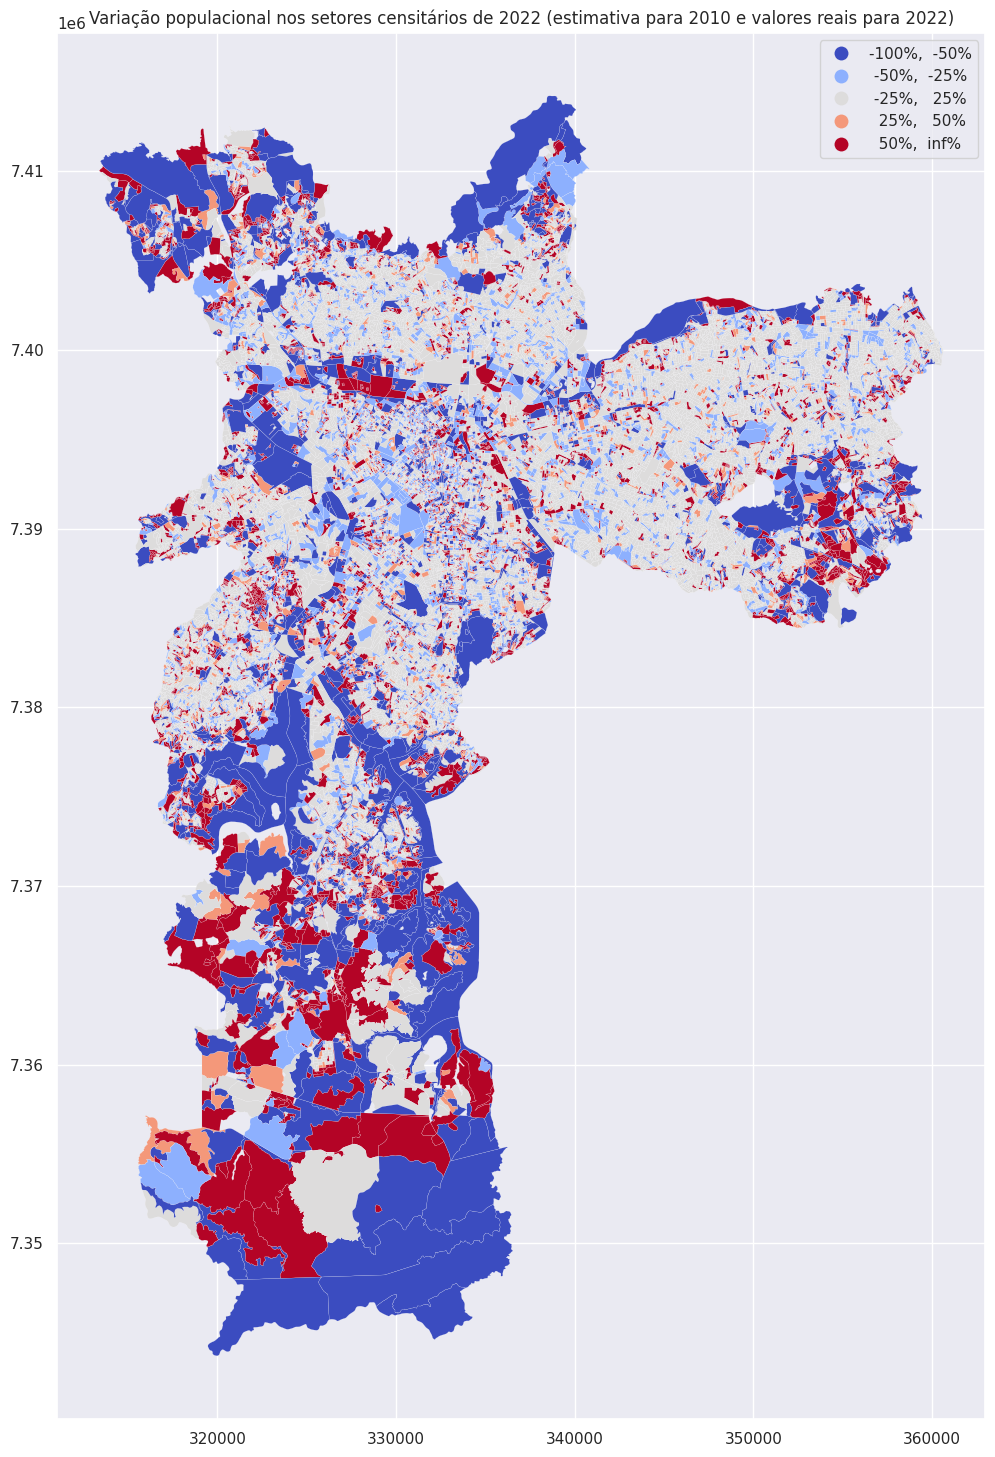

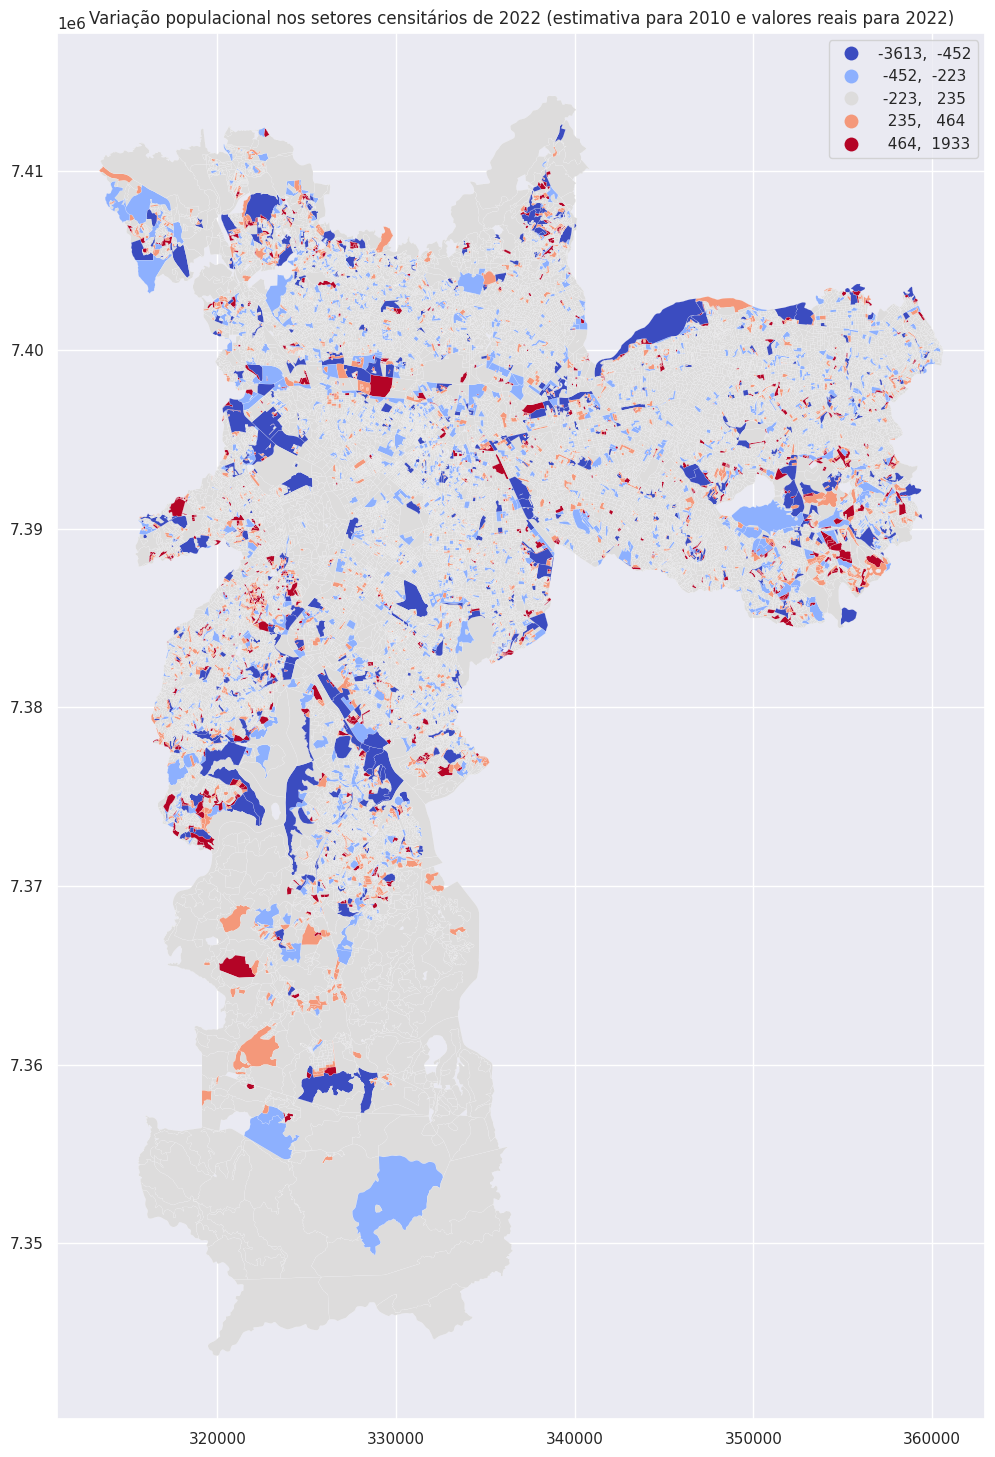

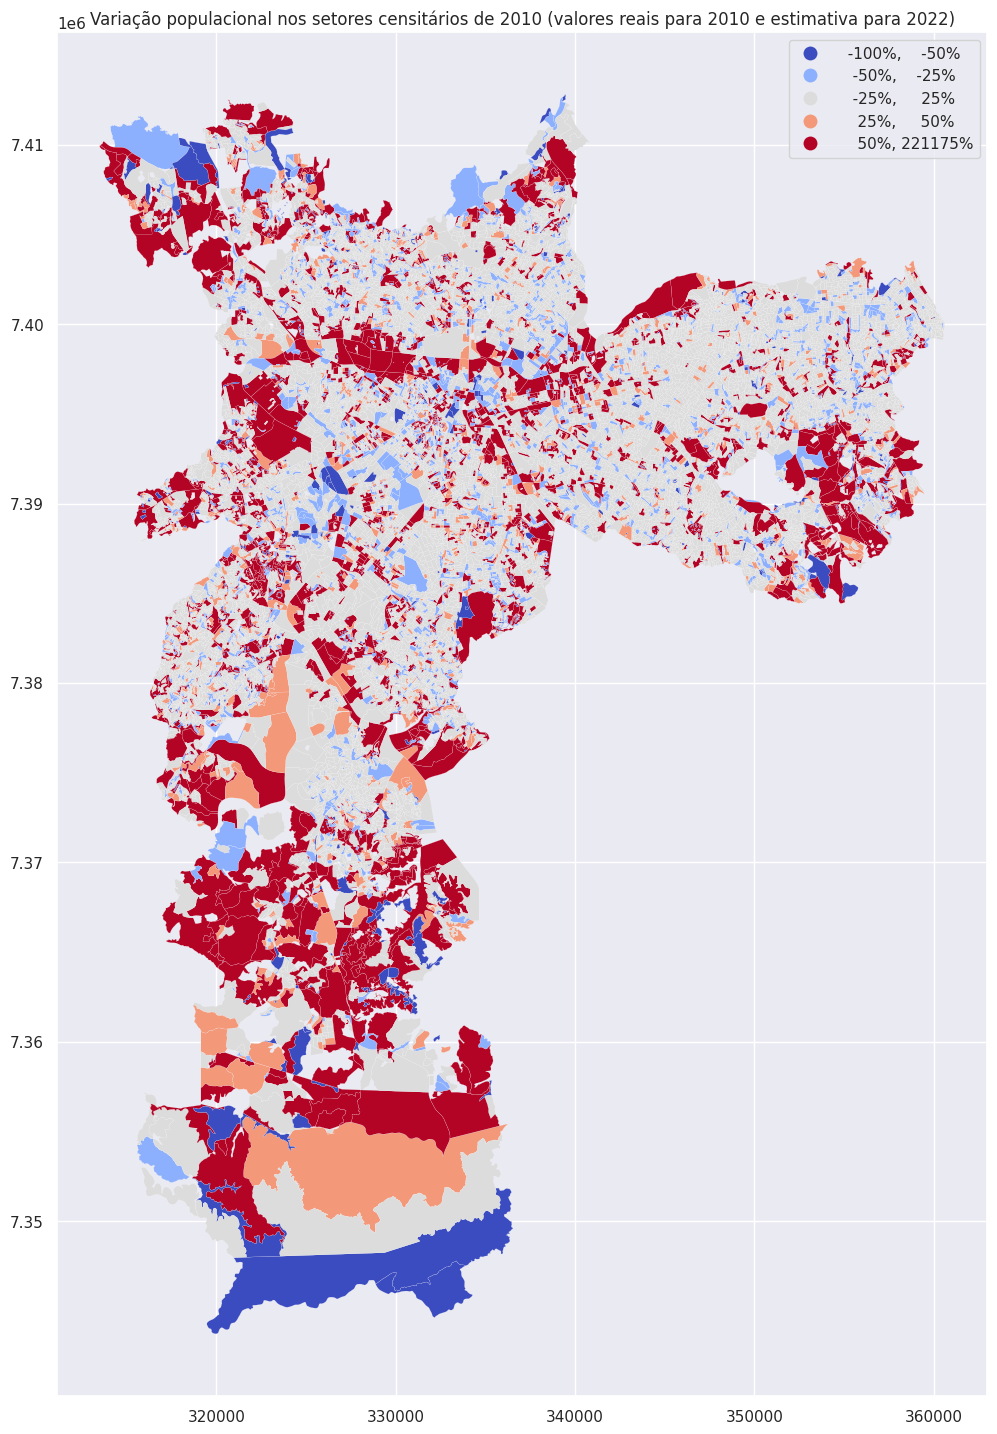

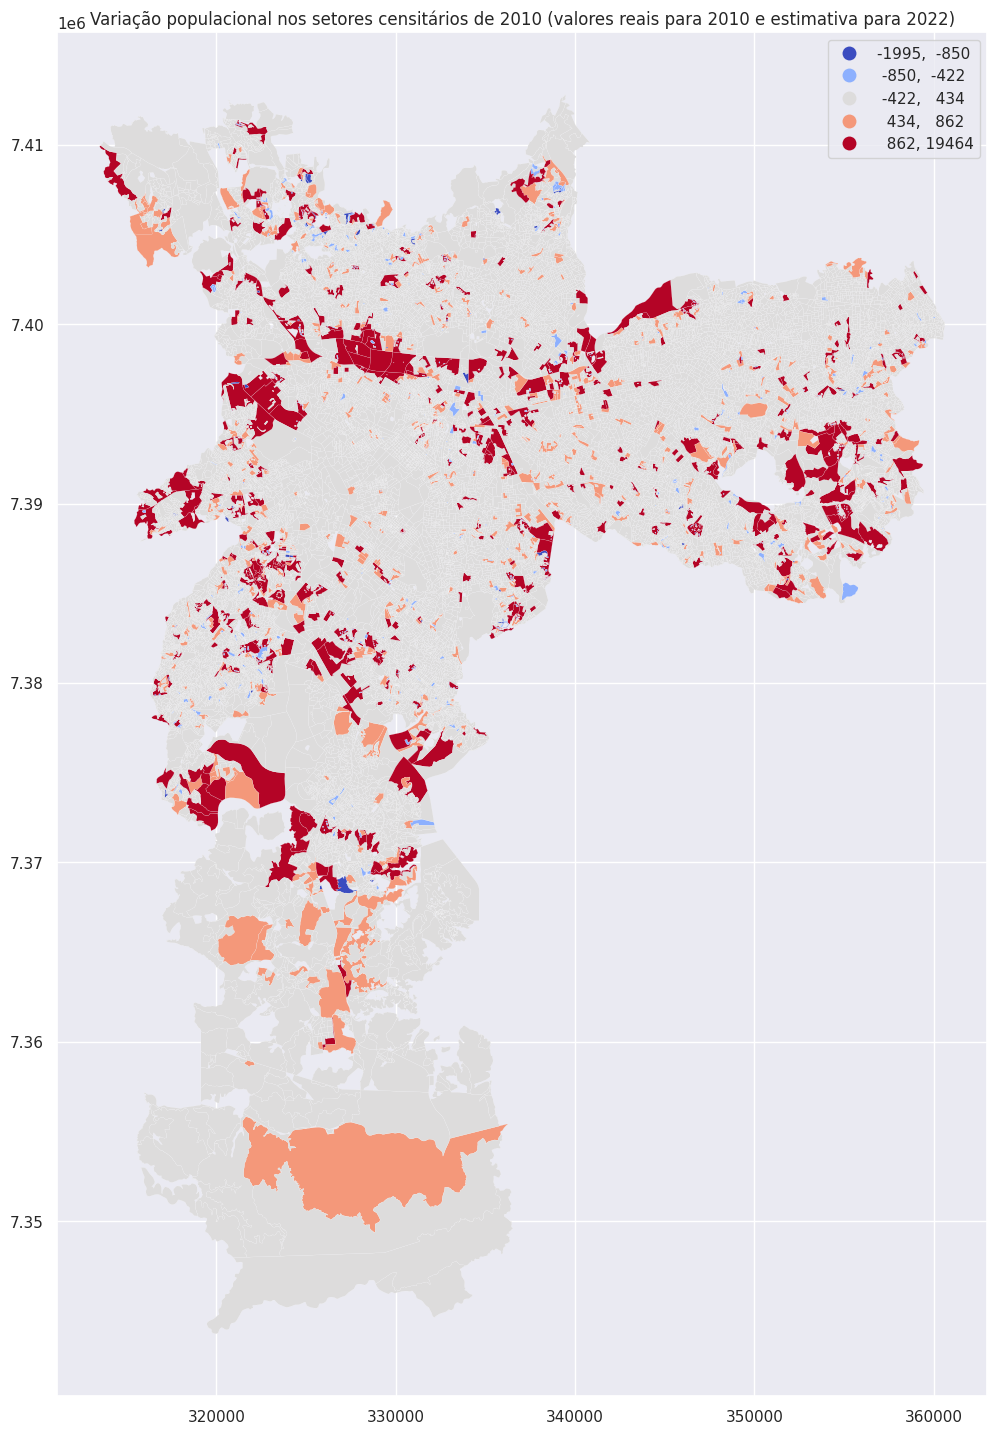

In [92]:
def static_map(df:gpd.GeoDataFrame, title:str, color_column:str):
    ax = df.plot(
        column=color_column,
        scheme='userdefined',
        # k = 10,
        classification_kwds={'bins':[-100+i*25 for i in range(1,8)]},
        cmap='coolwarm',
        legend=True,
        legend_kwds={"loc": "upper right", "fmt": "{:.0f}%"},
        linewidth=0.1,
        figsize=(12, 30),
    )
    
    ax.set_title(title)

    return ax

for df, title in zip([sample22.rename(columns=mapper_22), sample10.rename(columns=mapper_10)],
                     [
                         'Variação populacional nos setores censitários de 2022 (estimativa para 2010 e valores reais para 2022)',
                         'Variação populacional nos setores censitários de 2010 (valores reais para 2010 e estimativa para 2022)'
                     ]) :

    common_args = dict(
        cmap='coolwarm',
        legend=True,
        linewidth=0.1,
        figsize=(12, 18),
    )
    
    ax = df.plot(
        column='Variação populacional (percentual)',
        scheme='userdefined',
        # k = 10,
        classification_kwds={'bins':[-50, -25, 25, 50]},
        legend_kwds={"loc": "upper right", "fmt": "{:.0f}%"},
        **common_args
    )
    
    ax.set_title(title)
    filename = title.split('(')[0][:-1]
    plt.savefig(f'plots/{title}.png')
    
    
    ax = df.plot(
        column='Variação populacional (absoluta)',
        scheme='stdmean',
        k = 10,
        legend_kwds={"loc": "upper right", "fmt": "{:.0f}"},
        **common_args
    )
    
    ax.set_title(title)
    filename = title.split('(')[0][:-1]
    plt.savefig(f'plots/{title} - variação absoluta.png')